## Dataset

   - country : user country based on the IP address

   - age : user age. Self-reported at sign-up step

   - new_user : whether the user created the account during this session or had already an account and simply came back to the site

   - source : marketing channel source
        - Ads: came to the site by clicking on an advertisement
        - Seo: came to the site by clicking on search results
        - Direct: came to the site by directly typing the URL on the browser

   - total_pages_visited: number of total pages visited during the session. This can be seen as a proxy for time spent on site and engagement

   - converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. 
 
## Goal
   - Increase conversion rate: # conversions / total sessions
 

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
data=pd.read_csv("conversion_data.csv")
  
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [2]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [3]:
# there are no missing values
data.isna().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [4]:
data.groupby(['country']).size()

country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64

In [5]:
data.groupby(['source']).size()

source
Ads        88740
Direct     72420
Seo       155040
dtype: int64

In [6]:
# 123 and 111 values seem unrealistic.
data['age'].unique()

array([ 25,  23,  28,  39,  30,  31,  27,  29,  38,  43,  24,  36,  37,
        33,  20,  35,  17,  50,  22,  18,  34,  19,  42,  32,  21,  48,
        40,  41,  26,  45,  44,  49,  46,  56,  52,  54,  51,  47,  53,
        60,  57,  55,  59,  61,  58,  62,  65,  63,  66,  67,  64,  68,
        69, 123,  70,  73,  77,  72,  79, 111])

In [7]:
#There are only two users. We can remove them.
data[data['age']>110]
data = data[data['age']<110]

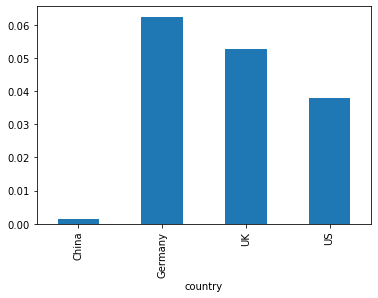

In [8]:
# ussers in China has a much lower conversion rate
data.groupby(['country'])['converted'].mean().plot.bar()
plt.show()

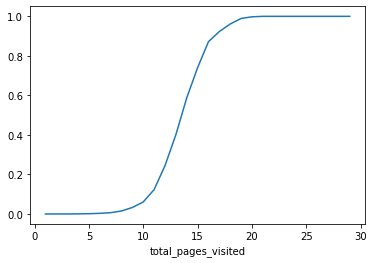

In [9]:
#users who spent more time on the website has a higher conversion rate
data.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.show()

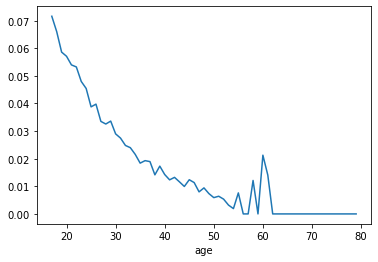

In [10]:
data.groupby(['age'])['converted'].mean().plot()
plt.show()

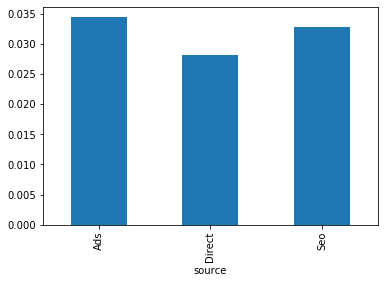

In [11]:
data.groupby(['source'])['converted'].mean().plot.bar()
plt.show()

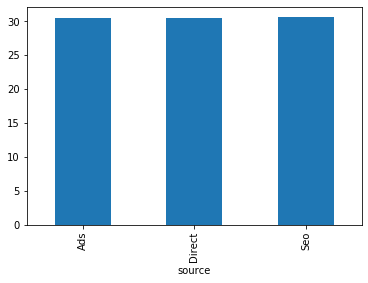

In [18]:
data.groupby(['source'])['age'].mean().plot.bar()
plt.show()

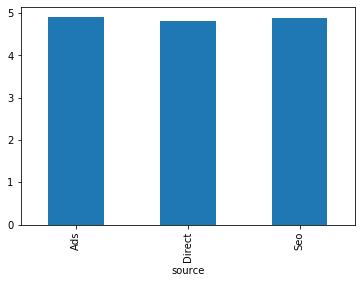

In [19]:
data.groupby(['source'])['total_pages_visited'].mean().plot.bar()
plt.show()

In [35]:
data[data['country']=='China'].groupby(['source']).size()/len(data[data['country']=='China'])

source
Ads       0.281468
Direct    0.227971
Seo       0.490562
dtype: float64

In [36]:
data[data['country']=='Germany'].groupby(['source']).size()/len(data[data['country']=='Germany'])

source
Ads       0.288012
Direct    0.219380
Seo       0.492608
dtype: float64

In [37]:
data[data['country']=='US'].groupby(['source']).size()/len(data[data['country']=='US'])

source
Ads       0.280198
Direct    0.230005
Seo       0.489797
dtype: float64

In [38]:
data[data['country']=='UK'].groupby(['source']).size()/len(data[data['country']=='UK'])

source
Ads       0.278994
Direct    0.229747
Seo       0.491259
dtype: float64

In [12]:
data.drop('converted', axis=1).corr()

,age,new_user,total_pages_visited
age,1.000000,0.012445,-0.046093
new_user,0.012445,1.000000,-0.082522
total_pages_visited,-0.046093,-0.082522,1.000000


# Conclusion 
- The site has large user base in US and China. Customers in China have a much lower conversion rate.
- The user base is pretty young, young users tend to have a higher conversion rate
- The original conversion rate is 3%
- SEO has little effect on conversion rate
- There two record with invalid values for age (>100 years), we will remove them from the training set. 